<a href="https://colab.research.google.com/github/gsush/Data_analyst_udacity/blob/main/explore_weather_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

#import numpy as np 
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
#make plots visible inside the jupyter notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression #calc the trend-data for later plots
import missingno as ms #visualize missing data

#improving the plot - quality (from: http://blog.rtwilson.com/how-to-get-nice-vector-graphics-in-your-exported-pdf-ipython-notebooks/)
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('png', 'pdf')

In [2]:
url1 = 'https://raw.githubusercontent.com/chrislicodes/Udacity-Data-Analyst-Nanodegree/master/P0-Explore-Weather-Trends/city_data.csv'
url2 = 'https://raw.githubusercontent.com/chrislicodes/Udacity-Data-Analyst-Nanodegree/master/P0-Explore-Weather-Trends/global_data.csv'
url3 = 'https://raw.githubusercontent.com/chrislicodes/Udacity-Data-Analyst-Nanodegree/master/P0-Explore-Weather-Trends/city_list.csv'
#load the datasets
df_city_data = pd.read_csv(url1)
df_global_data = pd.read_csv(url2)
df_city_list = pd.read_csv(url3)

In [3]:
#checking the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   city      71311 non-null  object 
 2   country   71311 non-null  object 
 3   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [4]:
#checking the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


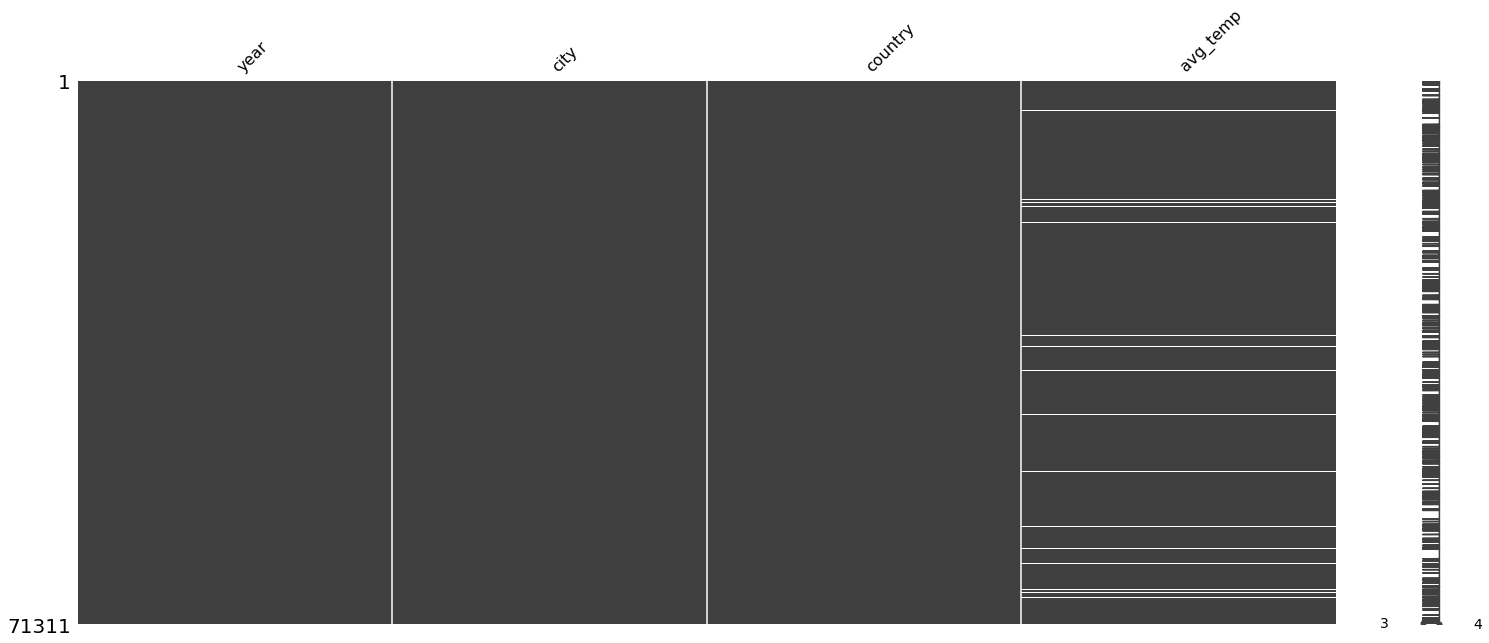

In [5]:
#plot missing values
ms.matrix(df_city_data)

In [6]:
#caluclate missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

In [7]:
#calculate the number of affected unique city names
len(df_city_data[missing_data]["city"].unique())

235

In [8]:
#checking the info of the global_data dataframe
df_global_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [9]:
#checking the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


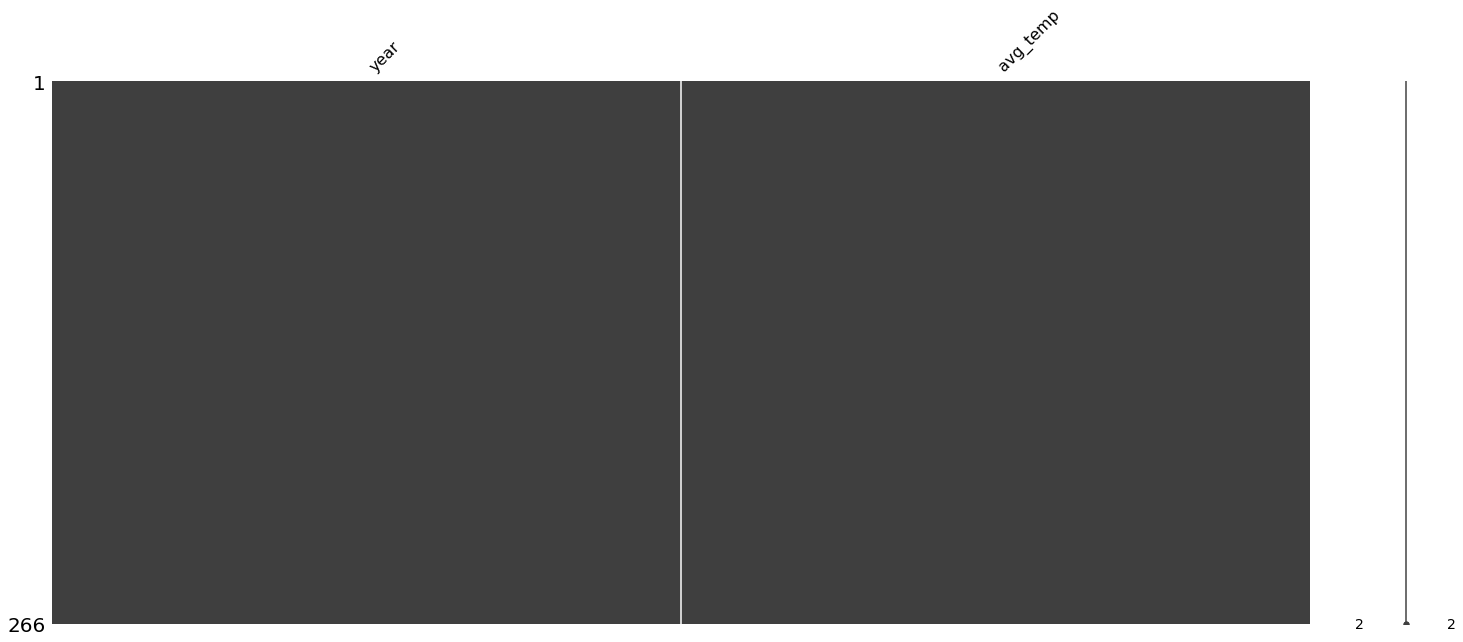

In [10]:
#plot missing values
ms.matrix(df_global_data)

In [11]:

#calculate the mininmal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].min())
print(df_global_data["avg_temp"].min())

1750
5.78


In [12]:
#calculate the maximal values of the "year" and "avg_temp" column in the global_data dataframe
print(df_global_data["year"].max())
print(df_global_data["avg_temp"].max())

2015
9.83


In [13]:
#select the cities from germany out of the city_list dataframe
df_city_list[df_city_list["country"] == "India"]

,city,country
6,Agra,India
7,Ahmadabad,India
12,Allahabad,India
14,Amritsar,India
30,Bangalore,India
44,Bhopal,India
85,Delhi,India
117,Haora,India
125,Hyderabad,India
129,Indore,India


In [14]:
# The first focus will lay on Bangalore so a reference to the df_city_data dataframe with the condition "city" == "Bangalore" will be created
#create a new reference to the city_data dataframe for the city "Bangalore"
df_bangalore = df_city_data[df_city_data["city"] == "Bangalore"]


In [15]:
#checking the head of the Berlin dataframe
df_bangalore.head()

,year,city,country,avg_temp
6367,1796,Bangalore,India,24.49
6368,1797,Bangalore,India,25.18
6369,1798,Bangalore,India,24.65
6370,1799,Bangalore,India,24.81
6371,1800,Bangalore,India,24.85


In [16]:
df_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 6367 to 6584
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      218 non-null    int64  
 1   city      218 non-null    object 
 2   country   218 non-null    object 
 3   avg_temp  211 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


In [17]:
# Now follows the "handling missing data" step mentioned earlier. The amount of missing data will be calculated and shown as a subset of the dataframe.
#calcuate the sum of the missing value in the Berlin dataframe in the column "avg_temp"
sum(df_bangalore["avg_temp"].isna())

7

In [18]:
#show the 7 missing values in the Berlin dataframe
df_bangalore[df_bangalore["avg_temp"].isna()]

,year,city,country,avg_temp
6379,1808,Bangalore,India,NaN
6380,1809,Bangalore,India,NaN
6381,1810,Bangalore,India,NaN
6382,1811,Bangalore,India,NaN
6383,1812,Bangalore,India,NaN
6434,1863,Bangalore,India,NaN
6435,1864,Bangalore,India,NaN


In [19]:
#create a copy of the city_data dataframe and the global_data dataframe for our needs
df_bangalore = df_city_data[(df_city_data["city"] == "Bangalore") & (df_city_data["year"] >= 1865)].copy()
df_global_data_plot = df_global_data[(df_global_data["year"] > 1864) & (df_global_data["year"] < 2014)].copy()

In [20]:
#check if both dataframe have the same length
len(df_global_data_plot) == len(df_bangalore)

True

In [21]:
#setting the window for the rolling mean
avg_num = 10

#calculate the rolling mean 
df_bangalore["rollingAverage"] = df_bangalore["avg_temp"].rolling(window = avg_num).mean()

#reset the index of the Berlin dataframe
df_bangalore.reset_index(inplace = True, drop = True)

#calculate the rolling mean for the global_data_plot dataframe
df_global_data_plot["rollingAverage"] = df_global_data_plot["avg_temp"].rolling(window = avg_num).mean()

In [22]:
#show the rows 10 to 20 of the Berlin dataframe
df_bangalore[10:20]

,year,city,country,avg_temp,rollingAverage
10,1875,Bangalore,India,24.64,24.703
11,1876,Bangalore,India,24.84,24.687
12,1877,Bangalore,India,25.23,24.714
13,1878,Bangalore,India,25.15,24.722
14,1879,Bangalore,India,24.39,24.669
15,1880,Bangalore,India,24.58,24.685
16,1881,Bangalore,India,24.76,24.714
17,1882,Bangalore,India,24.33,24.699
18,1883,Bangalore,India,24.25,24.673
19,1884,Bangalore,India,24.35,24.652


In [23]:
#show the rows 10 to 20 of the global_data_plot dataframe
df_global_data_plot[10:20]

,year,avg_temp,rollingAverage
125,1875,7.86,8.256
126,1876,8.08,8.235
127,1877,8.54,8.245
128,1878,8.83,8.303
129,1879,8.17,8.277
130,1880,8.12,8.269
131,1881,8.27,8.284
132,1882,8.13,8.278
133,1883,7.98,8.241
134,1884,7.77,8.175


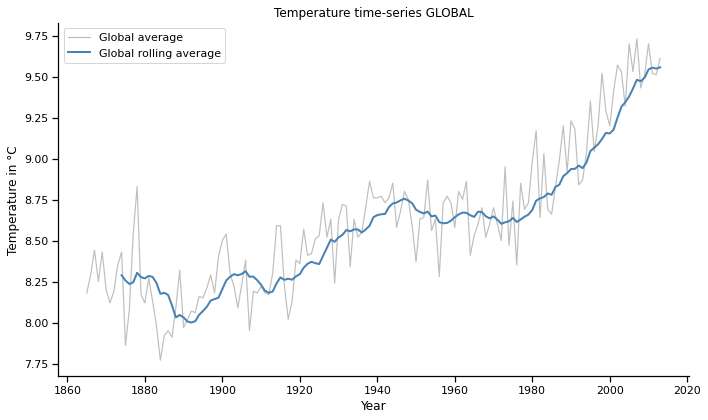

In [24]:
# The next steps includes plotting the data in a line plot. The rolling average will be plotted in front, so that the "raw data" behind it
# still visible and one can get a feeling about how the rolling mean builds up.
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data_plot, label = "Global average", alpha = 0.5,
                 color = "grey", lw = 1.2)
    sns.lineplot(x = "year", y = "rollingAverage", data = df_global_data_plot, label = "Global rolling average",
                 color = "steelblue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("Temperature in °C")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("Temperature time-series GLOBAL")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

Text(0.5, 1.0, "Rolling standard deviation for the global 'avg_temp' data")

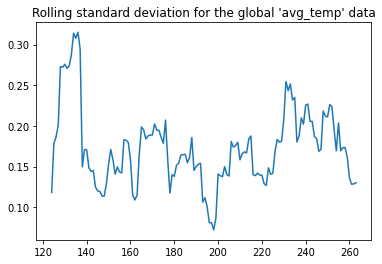

In [25]:
#calculate the rolling standard deviaton for the global_data dataframe and plot it
df_global_data_plot["avg_temp"].rolling(window = avg_num).std().plot()

#set the title for the plot
plt.title("Rolling standard deviation for the global 'avg_temp' data")

In [29]:
def prepare_df(cities, avg_num = 10):
    """
    INPUT: cities - list of strings, city names
           avg_num - integer, window for the rolling mean

    OUTPUT: dictionary with preprocessed dataframes and citynames as key
    """    
    #create empty dict
    results = {}    
    
    #loop for all city names
    for x in cities:
        #selecting dataframe for the chosen city and years bigger or equal 1750 and smaller 2014 (for consistency)
        df_x = df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] >= 1865) &
                            (df_city_data["year"] < 2014)].copy()
        
        #calculate rolling average with window = avg_num
        df_x["rollingAverage"] = df_x["avg_temp"].rolling(window = avg_num).mean()
        
        #calculating the trend
        try:
            #loading the model
            trend_model = LinearRegression()
            
            #define x and y values
            X = df_x[["year"]]
            y = df_x[["avg_temp"]]
            
            #fit the values to the model
            trend_model.fit(X, y)
            
            #predict the values with the X data to get the trend line and add it to the dataframe
            df_x["trend"] = trend_model.predict(X)
            print(f"{x} slope: {trend_model.coef_}")
                       
        except:
            #in case of NaN Values 
            print("Could not calculate trend.")
        
        finally:
            #reset the index and add the dataframe to the dictionary
            df_x.reset_index(inplace = True, drop = True)
            results[x] = df_x    
    
    for x in results:
        #print the average temperature from 1865 to 2013 for the chosen countries
        print(f'The average temperature in {x} (1865 - 2013) is: {results[x]["avg_temp"].mean():.2f} °C')
        print(f'More {x} values: Max: {results[x]["avg_temp"].max():.2f} °C; Min: {results[x]["avg_temp"].min():.2f} °C \n')
    #copy the global data for years < 2014
    df_global = df_global_data[df_global_data["year"] < 2014].copy()
    
    #caluclating the trend line as described above (I could also do this one time outside this function, but in case I 
    #would had to change the global data somehow I put it in here - also I started with the functionality to choose the timescale.)
    try:
        trend_model = LinearRegression()
        X = df_global["year"]
        trend_model.fit(X = df_global[["year"]], y = df_global[["avg_temp"]])
        trend_plot = trend_model.predict(df_global[["year"]])
        df_global["trend"] = trend_plot
        print(f"Global slope: {trend_model.coef_}")
        
    except:
        print("Error while calculating the global trend.")
        
    finally:
        
        df_global["rollingAverage"] = df_global["avg_temp"].rolling(window = avg_num).mean()    
        results["Global"] = df_global

        print(f'The global average temperature (1865 - 2013) is: {df_global["avg_temp"].mean():.2f} °C')
        print(f'More global values: Max: {df_global["avg_temp"].max():.2f} °C; Min: {df_global["avg_temp"].min():.2f} °C')
        #return the dict
        return results

def plot_results(result, fig_size = (10,6), global_plot = True, opac = 0.7, show_normal = False, trend = False):
    """
    INPUT: result - dictionary with dataframes from the function "prepare_df"
           fig_size - tuple to determine the size of the figure (width, height)
           global_plot - boolean, shows the plot of global data if set to true
           opac - float, sets the opacity for the city - data plots
           show_normal - boolean, plots also the avg_temp in addition to the rolling mean if set to true
           trend - boolean, shows the trend if set to true
    OUTPUT: plot
    """
    with sns.plotting_context("notebook"):
        #creating the figure and axes for the plot
        fig, ax = plt.subplots(figsize = fig_size)    

        #if global_plot = True shows the global data
        if global_plot:        
            sns.lineplot(x = "year", y = "rollingAverage", data = result["Global"], label = "Global", lw = 1.7)  
            #if global_plot = True shows the global trend
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result["Global"], label = "Global trend")

            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result["Global"], label = f"Global avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)

        #deletes the "Global" key-value pair in the dictionary to not double plot it    
        result.pop('Global', None)

        #plots the graph for every city-key in the dictionary
        for x in result:
            sns.lineplot(x = "year", y = "rollingAverage", data = result[x], label = x, alpha = opac)
            if show_normal:
                sns.lineplot(x = "year", y = "avg_temp", data = result[x], label = f"{x} avg_temp", alpha = 0.5, 
                             color = "grey", lw = 1.2)
            if trend:
                sns.lineplot(x = "year", y = "trend", data = result[x], label = f"{x} trend")

        #loads the legend
        ax.legend()

        #set x and y labels and the title
        ax.set_ylabel("Rolling average temperature in °C")
        ax.set_xlabel("Year")
        ax.set_title("Temperature time-series")

        #deactivate right and top spine
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()

        #shows the plot
        plt.show()  

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


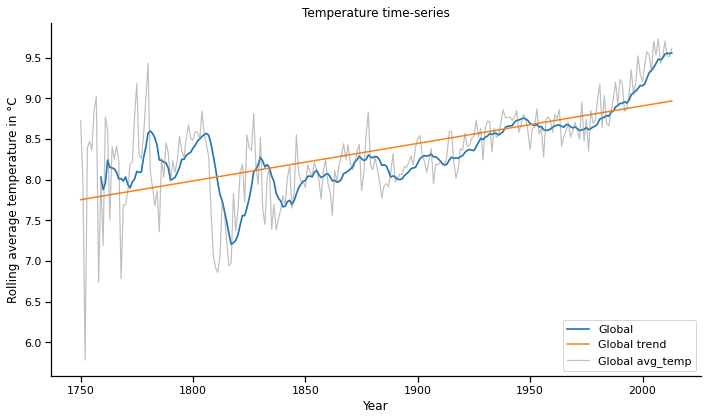

In [31]:
#creating an empty list
cities = []
#calling the newly created functions
plot_results(prepare_df(cities), global_plot=True, show_normal=True, opac = 1, trend = True)

Bangalore slope: [[0.00640878]]
The average temperature in Bangalore (1865 - 2013) is: 25.03 °C
More Bangalore values: Max: 26.61 °C; Min: 24.25 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


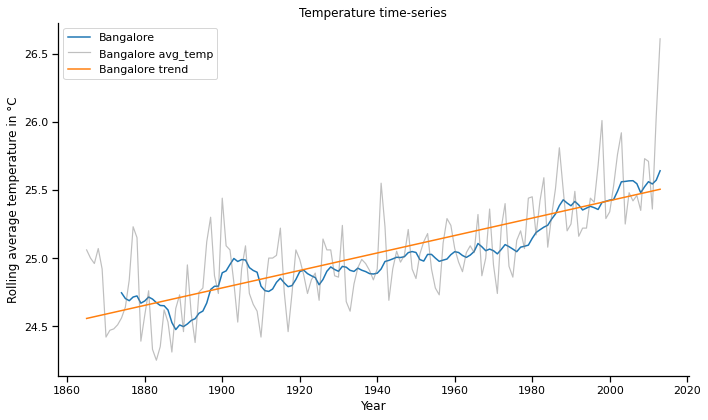

In [32]:
cities = ["Bangalore"]
plot_results(prepare_df(cities), global_plot=False, show_normal=True, opac = 1, trend = True)


Text(0.5, 1.0, "Rolling standard deviation for the Bangalore 'avg_temp' data")

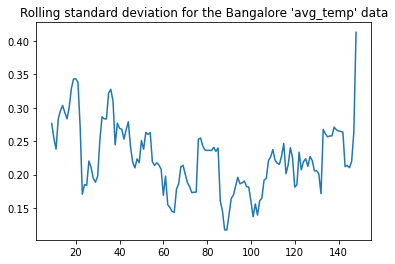

In [34]:
df_bangalore["avg_temp"].rolling(window = avg_num).std().plot()
plt.title("Rolling standard deviation for the Bangalore 'avg_temp' data")

Bangalore slope: [[0.00640878]]
The average temperature in Bangalore (1865 - 2013) is: 25.03 °C
More Bangalore values: Max: 26.61 °C; Min: 24.25 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


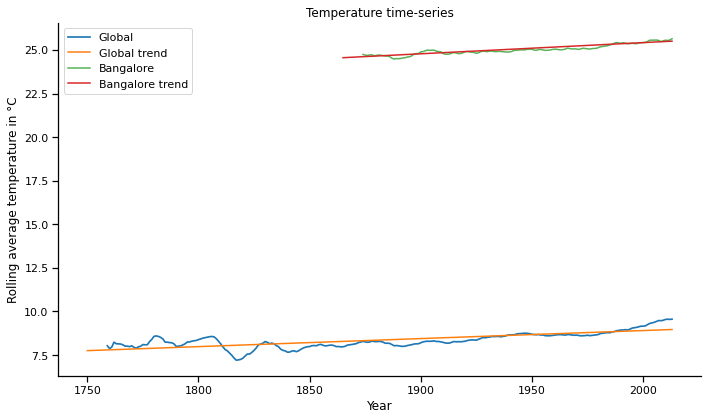

In [35]:
cities = ["Bangalore"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

In [36]:
#calculating the correlation between the berlin avg_temp and the global avg_temp
df_bangalore[["avg_temp"]].corrwith(df_global_data_plot["avg_temp"])

avg_temp   -0.23357
dtype: float64

Bangalore slope: [[0.00640878]]
Haora slope: [[0.00677432]]
Bhopal slope: [[0.00630332]]
The average temperature in Bangalore (1865 - 2013) is: 25.03 °C
More Bangalore values: Max: 26.61 °C; Min: 24.25 °C 

The average temperature in Haora (1865 - 2013) is: 26.22 °C
More Haora values: Max: 27.37 °C; Min: 24.94 °C 

The average temperature in Bhopal (1865 - 2013) is: 25.44 °C
More Bhopal values: Max: 26.68 °C; Min: 23.97 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


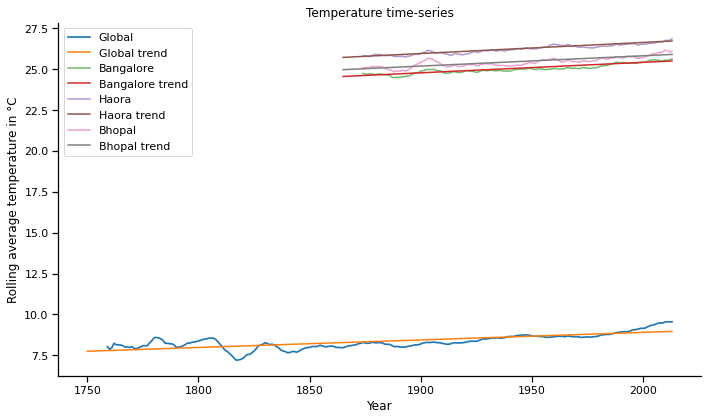

In [38]:
cities = "Bangalore Haora Bhopal".split()
plot_results(prepare_df(cities), opac = 0.7, trend=True)

In [39]:
#getting the avg_temp data for Bangalore and Haora in the year 2013
for x in ["Bangalore", "Haora"]:
    print(f'{x}: {df_city_data[(df_city_data["city"] == x) & (df_city_data["year"] == 2013)]["avg_temp"]}')

Bangalore: 6584    26.61
Name: avg_temp, dtype: float64
Haora: 24787    27.37
Name: avg_temp, dtype: float64


Haora slope: [[0.00677432]]
The average temperature in Haora (1865 - 2013) is: 26.22 °C
More Haora values: Max: 27.37 °C; Min: 24.94 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


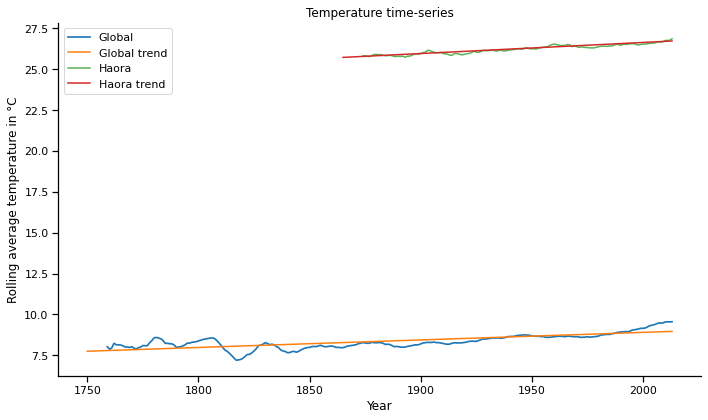

In [43]:
cities = ["Haora"]
plot_results(prepare_df(cities), global_plot=True, show_normal=False, opac = 0.8, trend = True)

Bangalore slope: [[0.00640878]]
Haora slope: [[0.00677432]]
Bhopal slope: [[0.00630332]]
The average temperature in Bangalore (1865 - 2013) is: 25.03 °C
More Bangalore values: Max: 26.61 °C; Min: 24.25 °C 

The average temperature in Haora (1865 - 2013) is: 26.22 °C
More Haora values: Max: 27.37 °C; Min: 24.94 °C 

The average temperature in Bhopal (1865 - 2013) is: 25.44 °C
More Bhopal values: Max: 26.68 °C; Min: 23.97 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


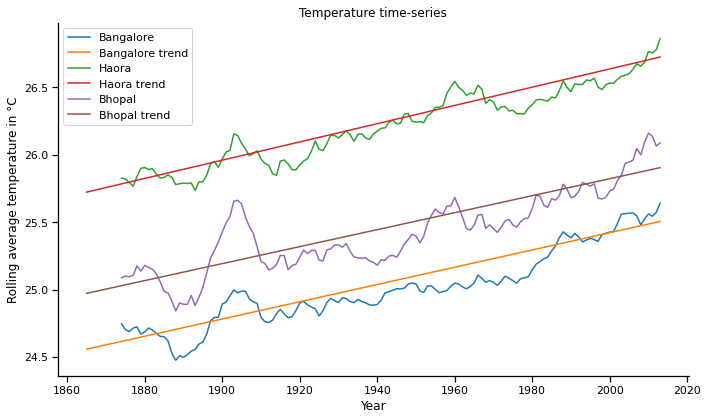

In [45]:
cities = ["Bangalore", "Haora","Bhopal"]
plot_results(prepare_df(cities), global_plot=False, show_normal=False, opac = 1, trend = True)

In [46]:
#calculating the correlation between the Berlin avg_temp and the Hamburg avg_temp
prepare_df(["Bangalore"])["Bangalore"][["avg_temp"]].corrwith(prepare_df(["Haora"])["Haora"]["avg_temp"])

Bangalore slope: [[0.00640878]]
The average temperature in Bangalore (1865 - 2013) is: 25.03 °C
More Bangalore values: Max: 26.61 °C; Min: 24.25 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C
Haora slope: [[0.00677432]]
The average temperature in Haora (1865 - 2013) is: 26.22 °C
More Haora values: Max: 27.37 °C; Min: 24.94 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


avg_temp    0.755192
dtype: float64

In [47]:
#check for duplicates among the city column
cities = df_city_data.groupby(["city", "country"], as_index = False).count()["city"]
cities[cities.duplicated()]

10        Alexandria
34         Barcelona
46        Birmingham
72           Colombo
126        Hyderabad
157         Kingston
164           La Paz
175           London
178      Los Angeles
281         Santiago
282         Santiago
284    Santo Domingo
324         Valencia
Name: city, dtype: object

In [49]:
#creating the key by joining the city and country column
df_city_data["key"] = df_city_data[["city", "country"]].apply(lambda x: " - ".join(x), axis=1)

In [52]:
df_city_data[100:200]

,year,city,country,avg_temp,key
100,1949,Abidjan,Côte D'Ivoire,26.51,Abidjan - Côte D'Ivoire
101,1950,Abidjan,Côte D'Ivoire,26.20,Abidjan - Côte D'Ivoire
102,1951,Abidjan,Côte D'Ivoire,26.32,Abidjan - Côte D'Ivoire
103,1952,Abidjan,Côte D'Ivoire,26.28,Abidjan - Côte D'Ivoire
104,1953,Abidjan,Côte D'Ivoire,26.24,Abidjan - Côte D'Ivoire
...,...,...,...,...,...
195,1873,Abu Dhabi,United Arab Emirates,26.42,Abu Dhabi - United Arab Emirates
196,1874,Abu Dhabi,United Arab Emirates,26.30,Abu Dhabi - United Arab Emirates
197,1875,Abu Dhabi,United Arab Emirates,26.13,Abu Dhabi - United Arab Emirates
198,1876,Abu Dhabi,United Arab Emirates,26.19,Abu Dhabi - United Arab Emirates


In [53]:
def calc_corr(cities, startYear):
    """
    INPUTS: cities - list of strings; city names
            startYear - integer; year to start calculating the correlation from
    OUTPUTS: dictionary with correlation values and the key as index
    """
    #creating an empty dictionary
    corr = {}    
    
    for x in cities:
        #selecting and copying the correct dataframe given different conditions
        df_x = df_city_data[(df_city_data["key"] == x) & (df_city_data["year"] >= startYear) & (df_city_data["year"] <= 2015)].copy()
        #reset the index to align the index of both dataframes
        df_x.reset_index(inplace = True)
        #calculate the correlation and add the result to the dictionary
        corr[x] = df_x[["avg_temp"]].corrwith(df_global_data["avg_temp"], axis = 0)
        
    #return the dictionary    
    return corr

In [54]:
corr_all = calc_corr(df_city_data["key"].unique(), 1750)
df_corr = pd.DataFrame(corr_all)
df_corr = df_corr.transpose().sort_values("avg_temp", ascending = False)
df_corr.reset_index(inplace = True)
df_corr["city"] = df_corr["index"].apply(lambda x: x.split(" - ")[0])
df_corr["country"] = df_corr["index"].apply(lambda x: x.split(" - ")[1])
df_corr.set_index("city", inplace = True)

In [55]:
df_corr.head()

,index,avg_temp,country
city,,,
Ufa,Ufa - Russia,0.763481,Russia
Tunis,Tunis - Tunisia,0.739872,Tunisia
Valencia,Valencia - Spain,0.721943,Spain
Montreal,Montreal - Canada,0.721534,Canada
Ottawa,Ottawa - Canada,0.718663,Canada


In [57]:
#choosing the indian cities out of the new dictionary
print(df_corr.loc[["Bangalore", "Haora", "Bhopal"]]["avg_temp"])

city
Bangalore    0.364274
Haora        0.376720
Bhopal       0.385948
Name: avg_temp, dtype: float64


In [58]:
df_corr[["avg_temp", "country"]].head(5)

,avg_temp,country
city,,
Ufa,0.763481,Russia
Tunis,0.739872,Tunisia
Valencia,0.721943,Spain
Montreal,0.721534,Canada
Ottawa,0.718663,Canada


In [59]:
df_corr[["avg_temp", "country"]][df_corr["avg_temp"] < 0.01].head(5)

,avg_temp,country
city,,
Ouagadougou,0.005583,Burkina Faso
Lagos,0.002495,Nigeria
Luanda,0.001921,Angola
Maseru,0.001244,Lesotho
Monrovia,-0.001666,Liberia


In [60]:
df_corr[["avg_temp", "country"]].tail(5)

,avg_temp,country
city,,
Asmara,-0.083861,Eritrea
Guayaquil,-0.088970,Ecuador
Harare,-0.095168,Zimbabwe
Maiduguri,-0.103415,Nigeria
Kano,-0.115508,Nigeria


Ufa slope: [[0.01366283]]
Maseru slope: [[0.00819822]]
Could not calculate trend.
The average temperature in Ufa (1865 - 2013) is: 2.08 °C
More Ufa values: Max: 5.00 °C; Min: -0.53 °C 

The average temperature in Maseru (1865 - 2013) is: 14.07 °C
More Maseru values: Max: 15.34 °C; Min: 13.02 °C 

The average temperature in Kano (1865 - 2013) is: 26.14 °C
More Kano values: Max: 27.76 °C; Min: 22.60 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


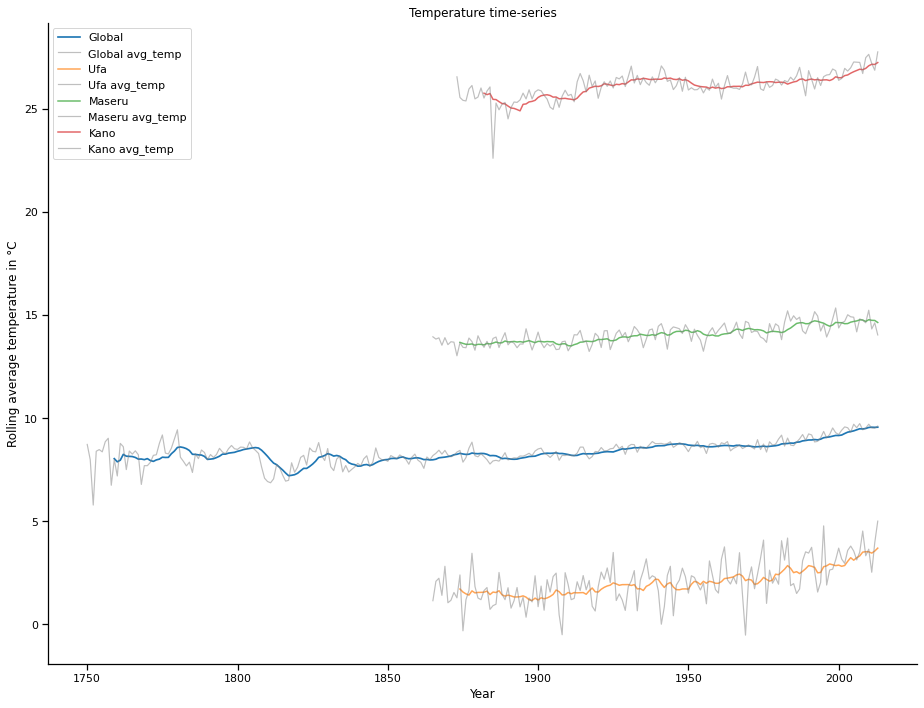

In [61]:
cities = ["Ufa", "Maseru", "Kano"]
plot_results(prepare_df(cities), (13,10), show_normal=True)

Ufa slope: [[0.01366283]]
The average temperature in Ufa (1865 - 2013) is: 2.08 °C
More Ufa values: Max: 5.00 °C; Min: -0.53 °C 

Global slope: [[0.00461111]]
The global average temperature (1865 - 2013) is: 8.36 °C
More global values: Max: 9.73 °C; Min: 5.78 °C


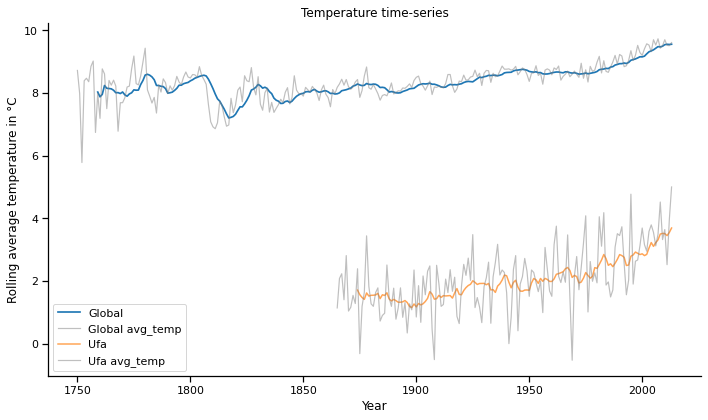

In [62]:
cities = ["Ufa"]
plot_results(prepare_df(cities), show_normal=True)